In [1]:
import pypld.pyPLD as pyPLD

import numpy as np
from scipy import ndimage, misc
import scipy.optimize as opt
import matplotlib.pyplot as plt
import matplotlib


In [2]:
#global parameters
dim_model=10
dim_experimental=4.8
res_experimental=480

res_model=int(res_experimental*dim_model/dim_experimental)

ang_step=29/5

#set plume modeling by double plumes to True
double=True 

xx, yy = np.mgrid[-dim_model/2:dim_model/2:dim_model/res_model, -dim_model/2:dim_model/2:dim_model/res_model] # def mgrid for use in navigating sample later


### Sample holder

In [3]:
##define our sample holder
a=0.75 #cm
b=1 #cm

A = np.argwhere(xx==-a-b)[0,0]
B = np.argwhere(xx== -a)[0,0]
C = np.argwhere(xx== +a)[0,0]
D = np.argwhere(xx== +a+b)[0,0]
E = np.argwhere(xx== -b/2)[0,0]
F = np.argwhere(xx== +b/2)[0,0]


sample_holder=np.array([[E,F,E,F],[A,B,E,F],[C,D,E,F],[E,F,A,B],[E,F,C,D]])

# Combinatorial film
A combinatorial fim uses two input targets giving rise to two plumes. These plumes introduce differetn atomic spices. By changing the distance between the plumes we can optimize the composition to give a decired gradient trough the samples. 

### Plume curve fit

### Import and interpolate film data


30.888687
517.275269


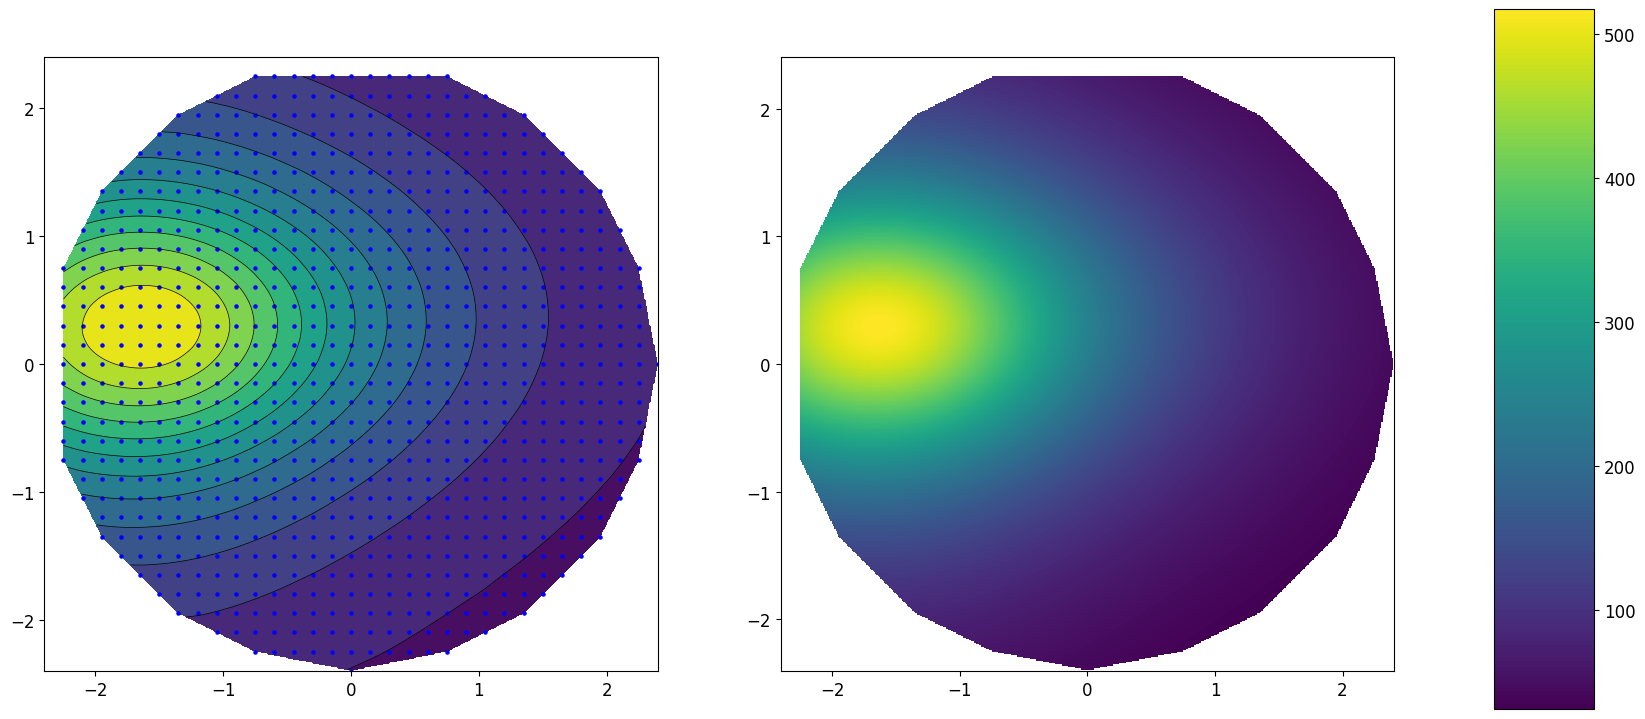

In [4]:
filename ='TiO2_100sccmO2_onSI_15000pulses_MAP1.txt'

Xi_TiO2, Yi_TiO2, Zi_TiO2 = pyPLD.read_elipsometry_data(filename,res=res_experimental, size_x=[-dim_experimental/2,dim_experimental/2], size_y=[-dim_experimental/2,dim_experimental/2],save=False)

Image rotation needed: 1.5750077854939235
Plume shift / centre: [0.2855949895615866, -1.6484342379958246]
Plume shift / centre after rot: [0.32567849686847605, -1.638413361169102]


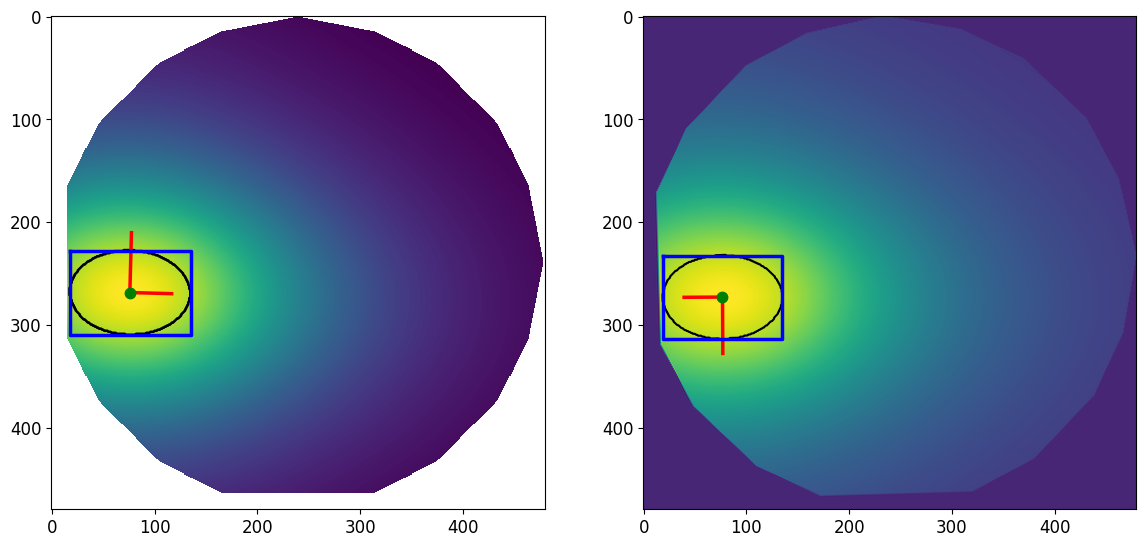

In [5]:
Shift_after_rot_TiO2,Shift_plume_TiO2, rotation_angle_TiO2=pyPLD.find_rotation_angle_and_centre_of_plume(Xi_TiO2, Yi_TiO2, Zi_TiO2, treshold=460, print_image=True)

### Fit film dilm data

5.377998071382613 9.999999999999998
30.000000000000004 44.956024599639235


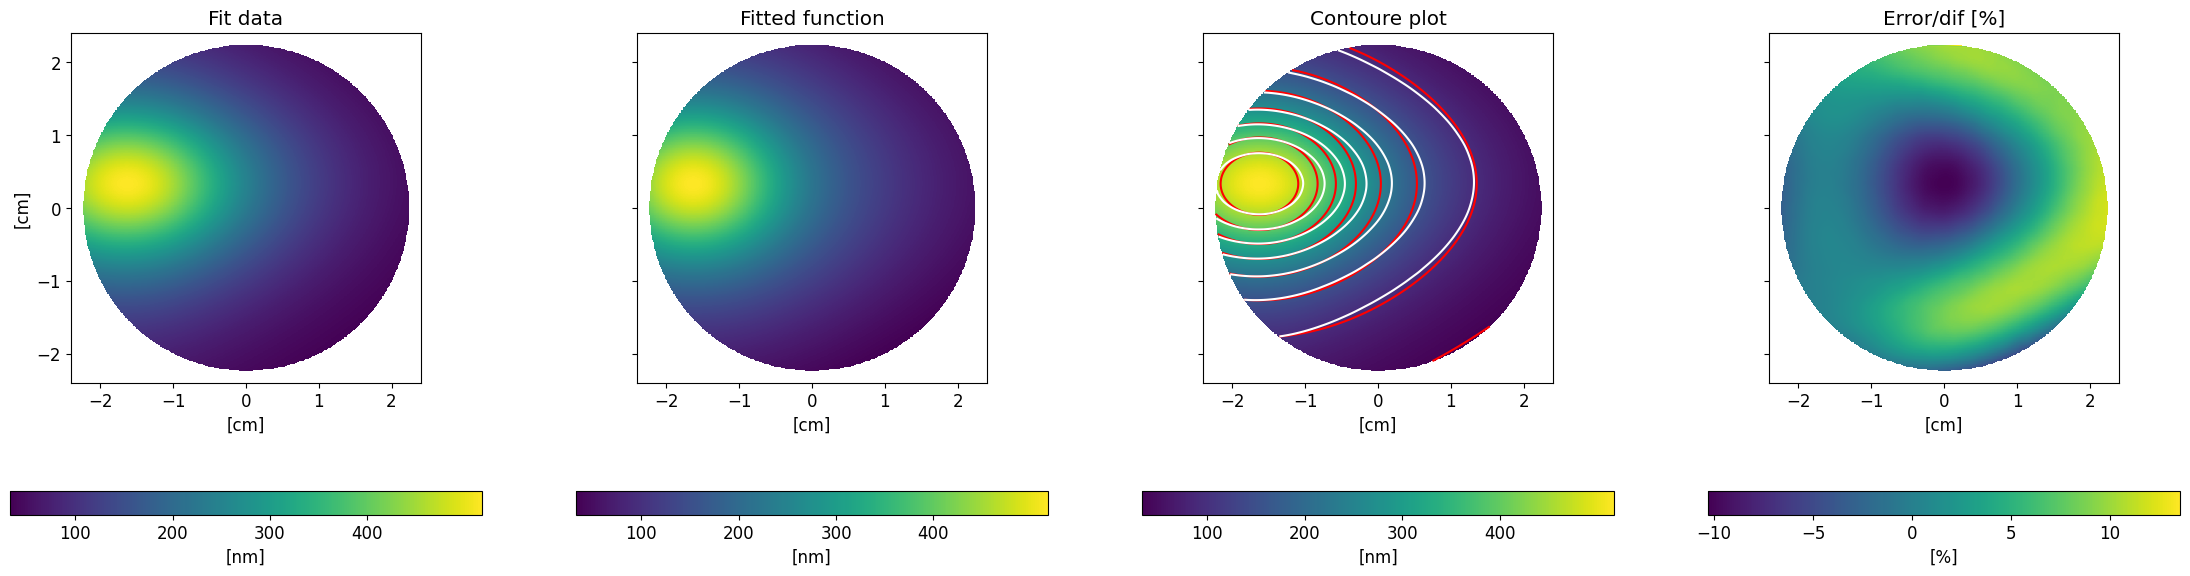

In [6]:
initial_guess = (
    np.max(Zi_TiO2), #plume max thikness
    4.405, #target to substrate distance meassured
    13.4, #initial geuss n_1
    6,#initial geuss m_1
    86, #initial geuss n_2
    13, #initial geuss m_2
    Shift_after_rot_TiO2[1], #plume shift found above
    Shift_after_rot_TiO2[0]) #plume shift found above

bounds=(
    (np.max(Zi_TiO2)-0.1,
     4.4,
     5,
     3,
     30,
     12,
     Shift_after_rot_TiO2[1]-0.01,
     Shift_after_rot_TiO2[0]-0.01),
    
    (np.max(Zi_TiO2)+0.1,
     4.41,
     30,
     10,
     100,
     100,
     Shift_after_rot_TiO2[1]+0.01,
     Shift_after_rot_TiO2[0]+0.01))

#Fitting
fit_data, data_fitted, popt_TiO2 = pyPLD.curve_fit_plume(Xi_TiO2,Yi_TiO2,Zi_TiO2, res_experimental, rotation_angle_TiO2, 15000, initial_guess, bounds, double=double )


pyPLD.plot_compare(Xi_TiO2, Yi_TiO2, fit_data,data_fitted,res_experimental, data_lable='Fit data', model_lable='Fitted function', error_lable='Error/dif [%]',save=False, filename='TiO2',fig_for_print=False, N_contours=8,D_ticks_cbar=100,D_tick_error_cbar=5)

print(popt_TiO2[2],popt_TiO2[3])
print(popt_TiO2[4],popt_TiO2[5])


17.037807
156.266327


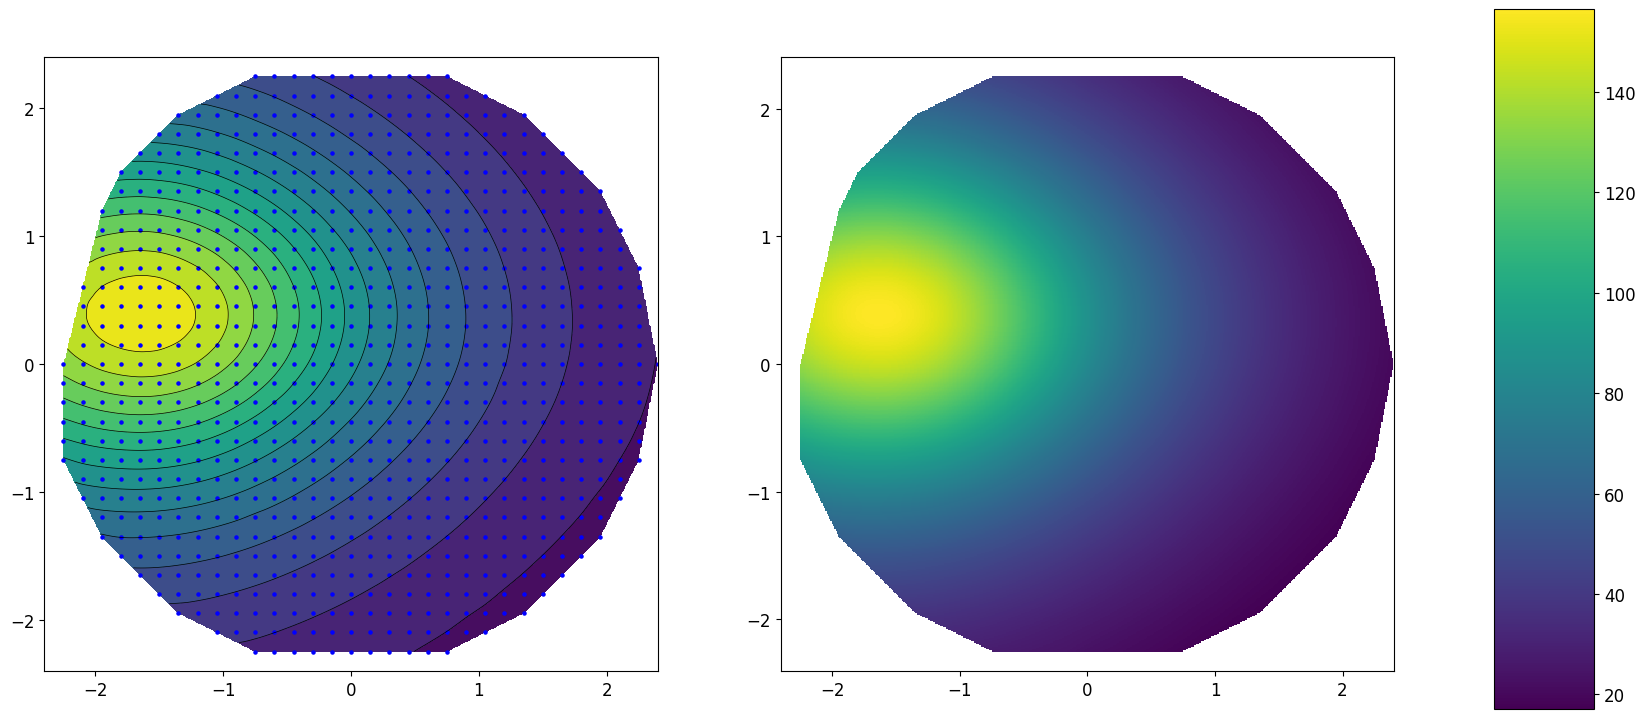

In [7]:
filename ='Cr2O3_MAP_basedon4points_Bsplinemodel_100sccmO2.txt'

Xi_Cr2O3, Yi_Cr2O3, Zi_Cr2O3 = pyPLD.read_elipsometry_data(filename,res=res_experimental, size_x=[-dim_experimental/2,dim_experimental/2], size_y=[-2.4,2.4],save=False)

Image rotation needed: 179.09123102802437
Plume shift / centre: [0.38580375782881005, -1.6484342379958246]
Plume shift / centre after rot: [-0.3757828810020878, 1.6484342379958243]


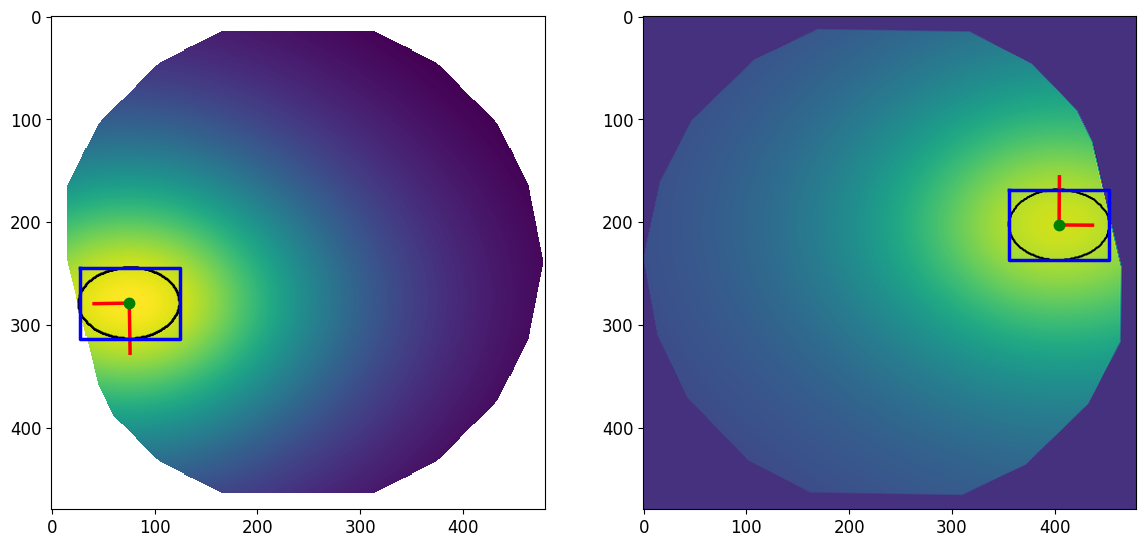

In [8]:
Shift_after_rot_Cr2O3,Shift_plume_Cr2O3, rotation_angle_Cr2O3=pyPLD.find_rotation_angle_and_centre_of_plume(Xi_Cr2O3, Yi_Cr2O3, Zi_Cr2O3, treshold=148, print_image=True)

4.265520521322138 6.28911612778663
17.47690656922319 30.28970190007217


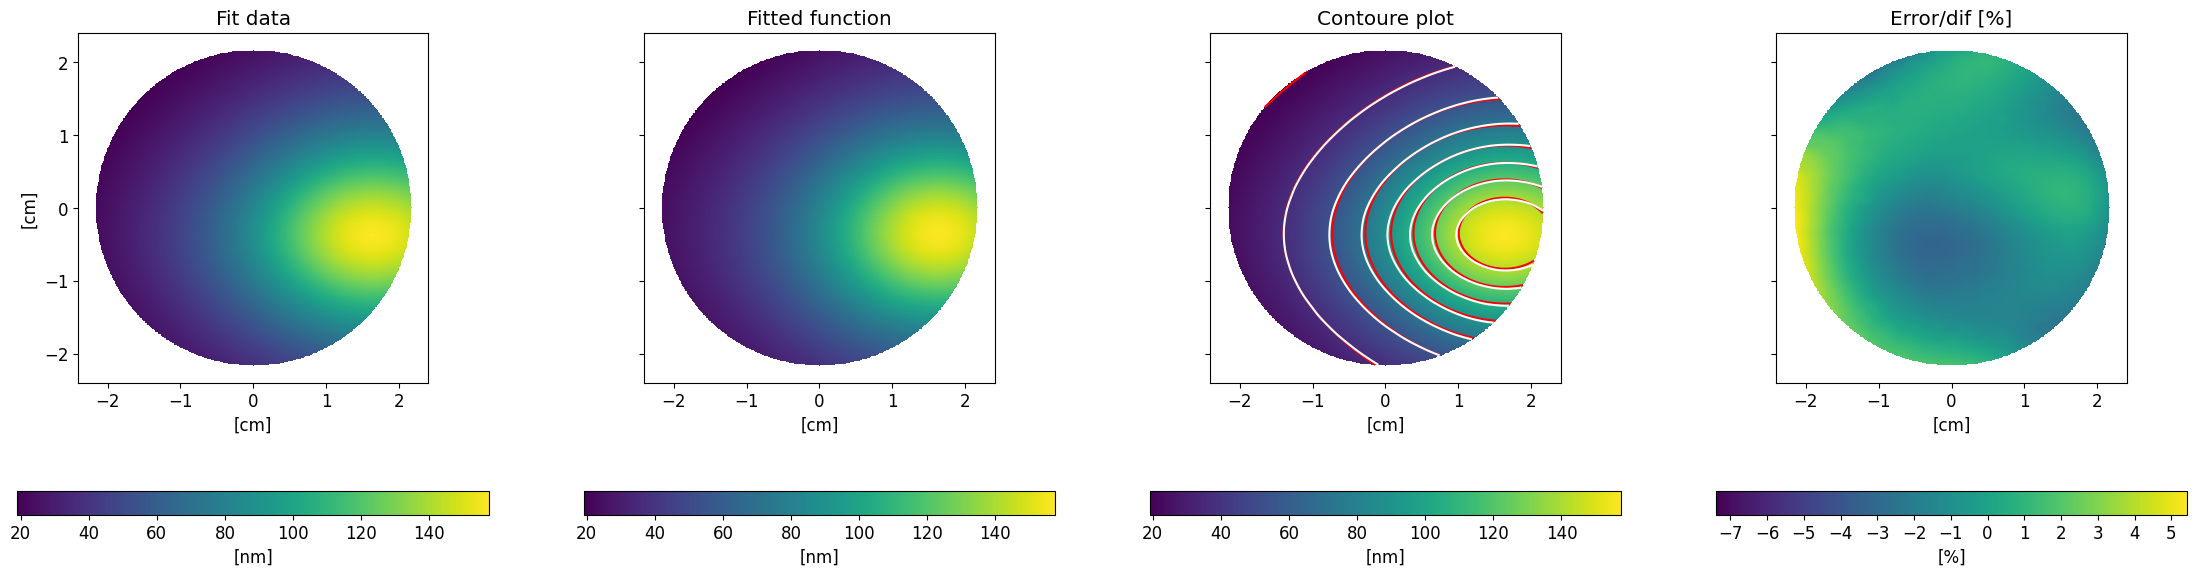

In [9]:
initial_guess = (np.max(Zi_Cr2O3),
                 4.405,
                 24,
                 14,
                 50,
                 30,
                 Shift_after_rot_Cr2O3[1],
                 Shift_after_rot_Cr2O3[0]
                )

bounds=(
    (np.max(Zi_Cr2O3)-0.1,
     4.4,
     3,
     2,
     15,
     8,
     Shift_after_rot_Cr2O3[1]-0.01,
     Shift_after_rot_Cr2O3[0]-0.01),
    (np.max(Zi_Cr2O3)+0.1,
     4.41,
     25,
     15,
     100,
     100,
     Shift_after_rot_Cr2O3[1]+0.1,
     Shift_after_rot_Cr2O3[0]+0.1))

#Fitting
fit_data, data_fitted, popt_Cr2O3 = pyPLD.curve_fit_plume(Xi_Cr2O3,Yi_Cr2O3,Zi_Cr2O3, res_experimental, rotation_angle_Cr2O3, 40000, initial_guess, bounds , double=double)


pyPLD.plot_compare(Xi_Cr2O3, Yi_Cr2O3, fit_data,data_fitted,res_experimental, data_lable='Fit data', model_lable='Fitted function', error_lable='Error/dif [%]',save=False,mask_scaling=0.9, filename='Cr2O3',fig_for_print=False, N_contours=8,D_ticks_cbar=20,D_tick_error_cbar=1)


print(popt_Cr2O3[2],popt_Cr2O3[3])
print(popt_Cr2O3[4],popt_Cr2O3[5])

## Optimize combinatoralial

In [10]:
shift_steps = 0.5 #size of shift steps in cm
#shift_steps = 0.2 #uncomment for high step resolution but long run time
# define grid in cm
shift_X = np.arange(0,3,shift_steps)
shift_Y = np.arange(0,3,shift_steps)


#Simulation values
pulse_ratio=2  #number of TiO2 pulses to CrN pulses
n_pulses_CrN_simulation=2000 # number of CrN pulses


thinfilms=np.empty([shift_X.shape[0],shift_Y.shape[0],res_model,res_model])
thinfilms_dopant_ratio=np.empty([shift_X.shape[0],shift_Y.shape[0],res_model,res_model])
n=0
for i in shift_X:
    m=0
    for j in shift_Y:
        plume_TiO2 =pyPLD.def_plume(T_0=popt_TiO2[0],
                 z=popt_TiO2[1], 
                 n=popt_TiO2[2], 
                 m=popt_TiO2[3], 
                 shift=[i,j],
                 dim=dim_model,
                 res=res_model,
                )  
        
        plume_CrN =pyPLD.def_plume(T_0=popt_Cr2O3[0],
                 z=popt_Cr2O3[1], 
                 n=popt_Cr2O3[2], 
                 m=popt_Cr2O3[3], 
                 shift=[i+popt_Cr2O3[4]-popt_TiO2[4],j+popt_Cr2O3[5]-popt_TiO2[5]],
                 dim=dim_model,
                 res=res_model,
                )  
        thinfilms[n,m][:,:] =(ndimage.rotate(plume_CrN, 180., reshape=False)+plume_TiO2*pulse_ratio+ndimage.rotate(plume_TiO2, 180., reshape=False)*(pulse_ratio*0.9))*n_pulses_CrN_simulation
        thinfilms_dopant_ratio[n,m][:,:] =(ndimage.rotate(plume_CrN, 180., reshape=False)/thinfilms[n,m][:,:])*n_pulses_CrN_simulation
        m=m+1
    n=n+1
print(thinfilms.shape)

(6, 6, 1000, 1000)


 Plot array of film thikneess and dopant ratio trough centre of film in x and y direction

Thickness:

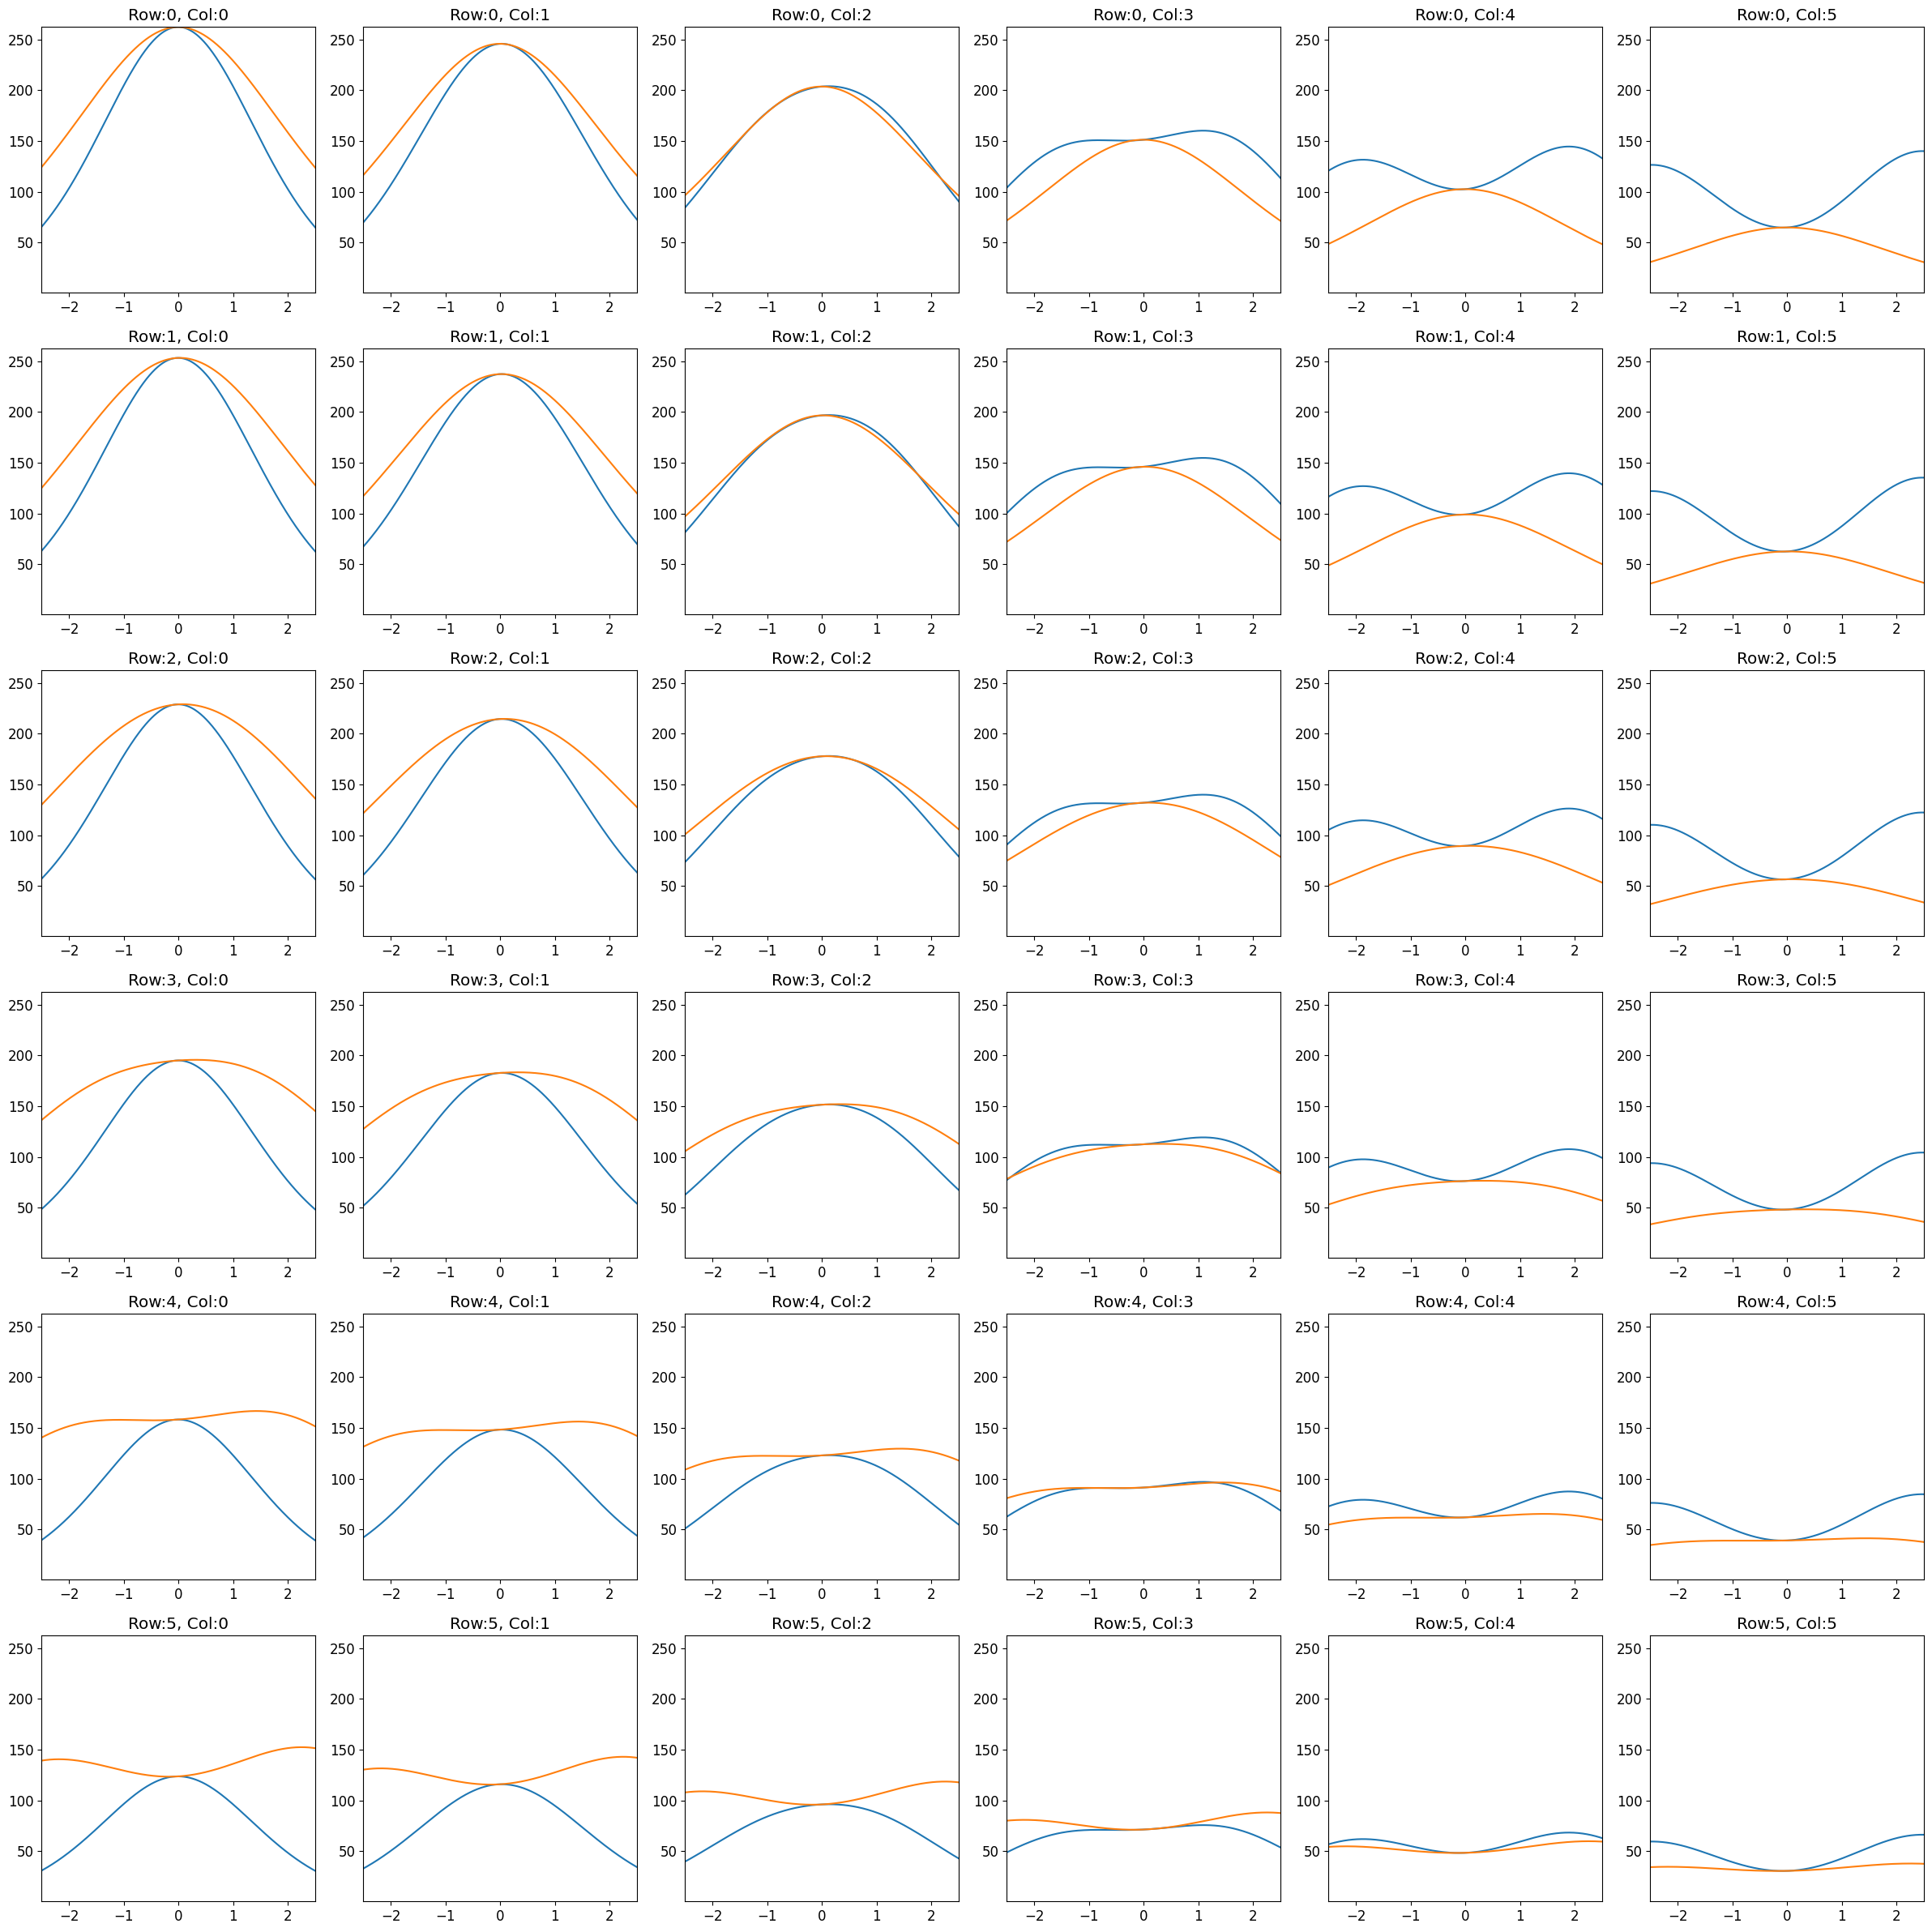

In [11]:
pyPLD.plot_array_of_1d_plots_trough_centre_of_films(xx,yy,thinfilms,res_model,dim_model,radius=2.5,filename=filename,save=False)

Dopant ratio:

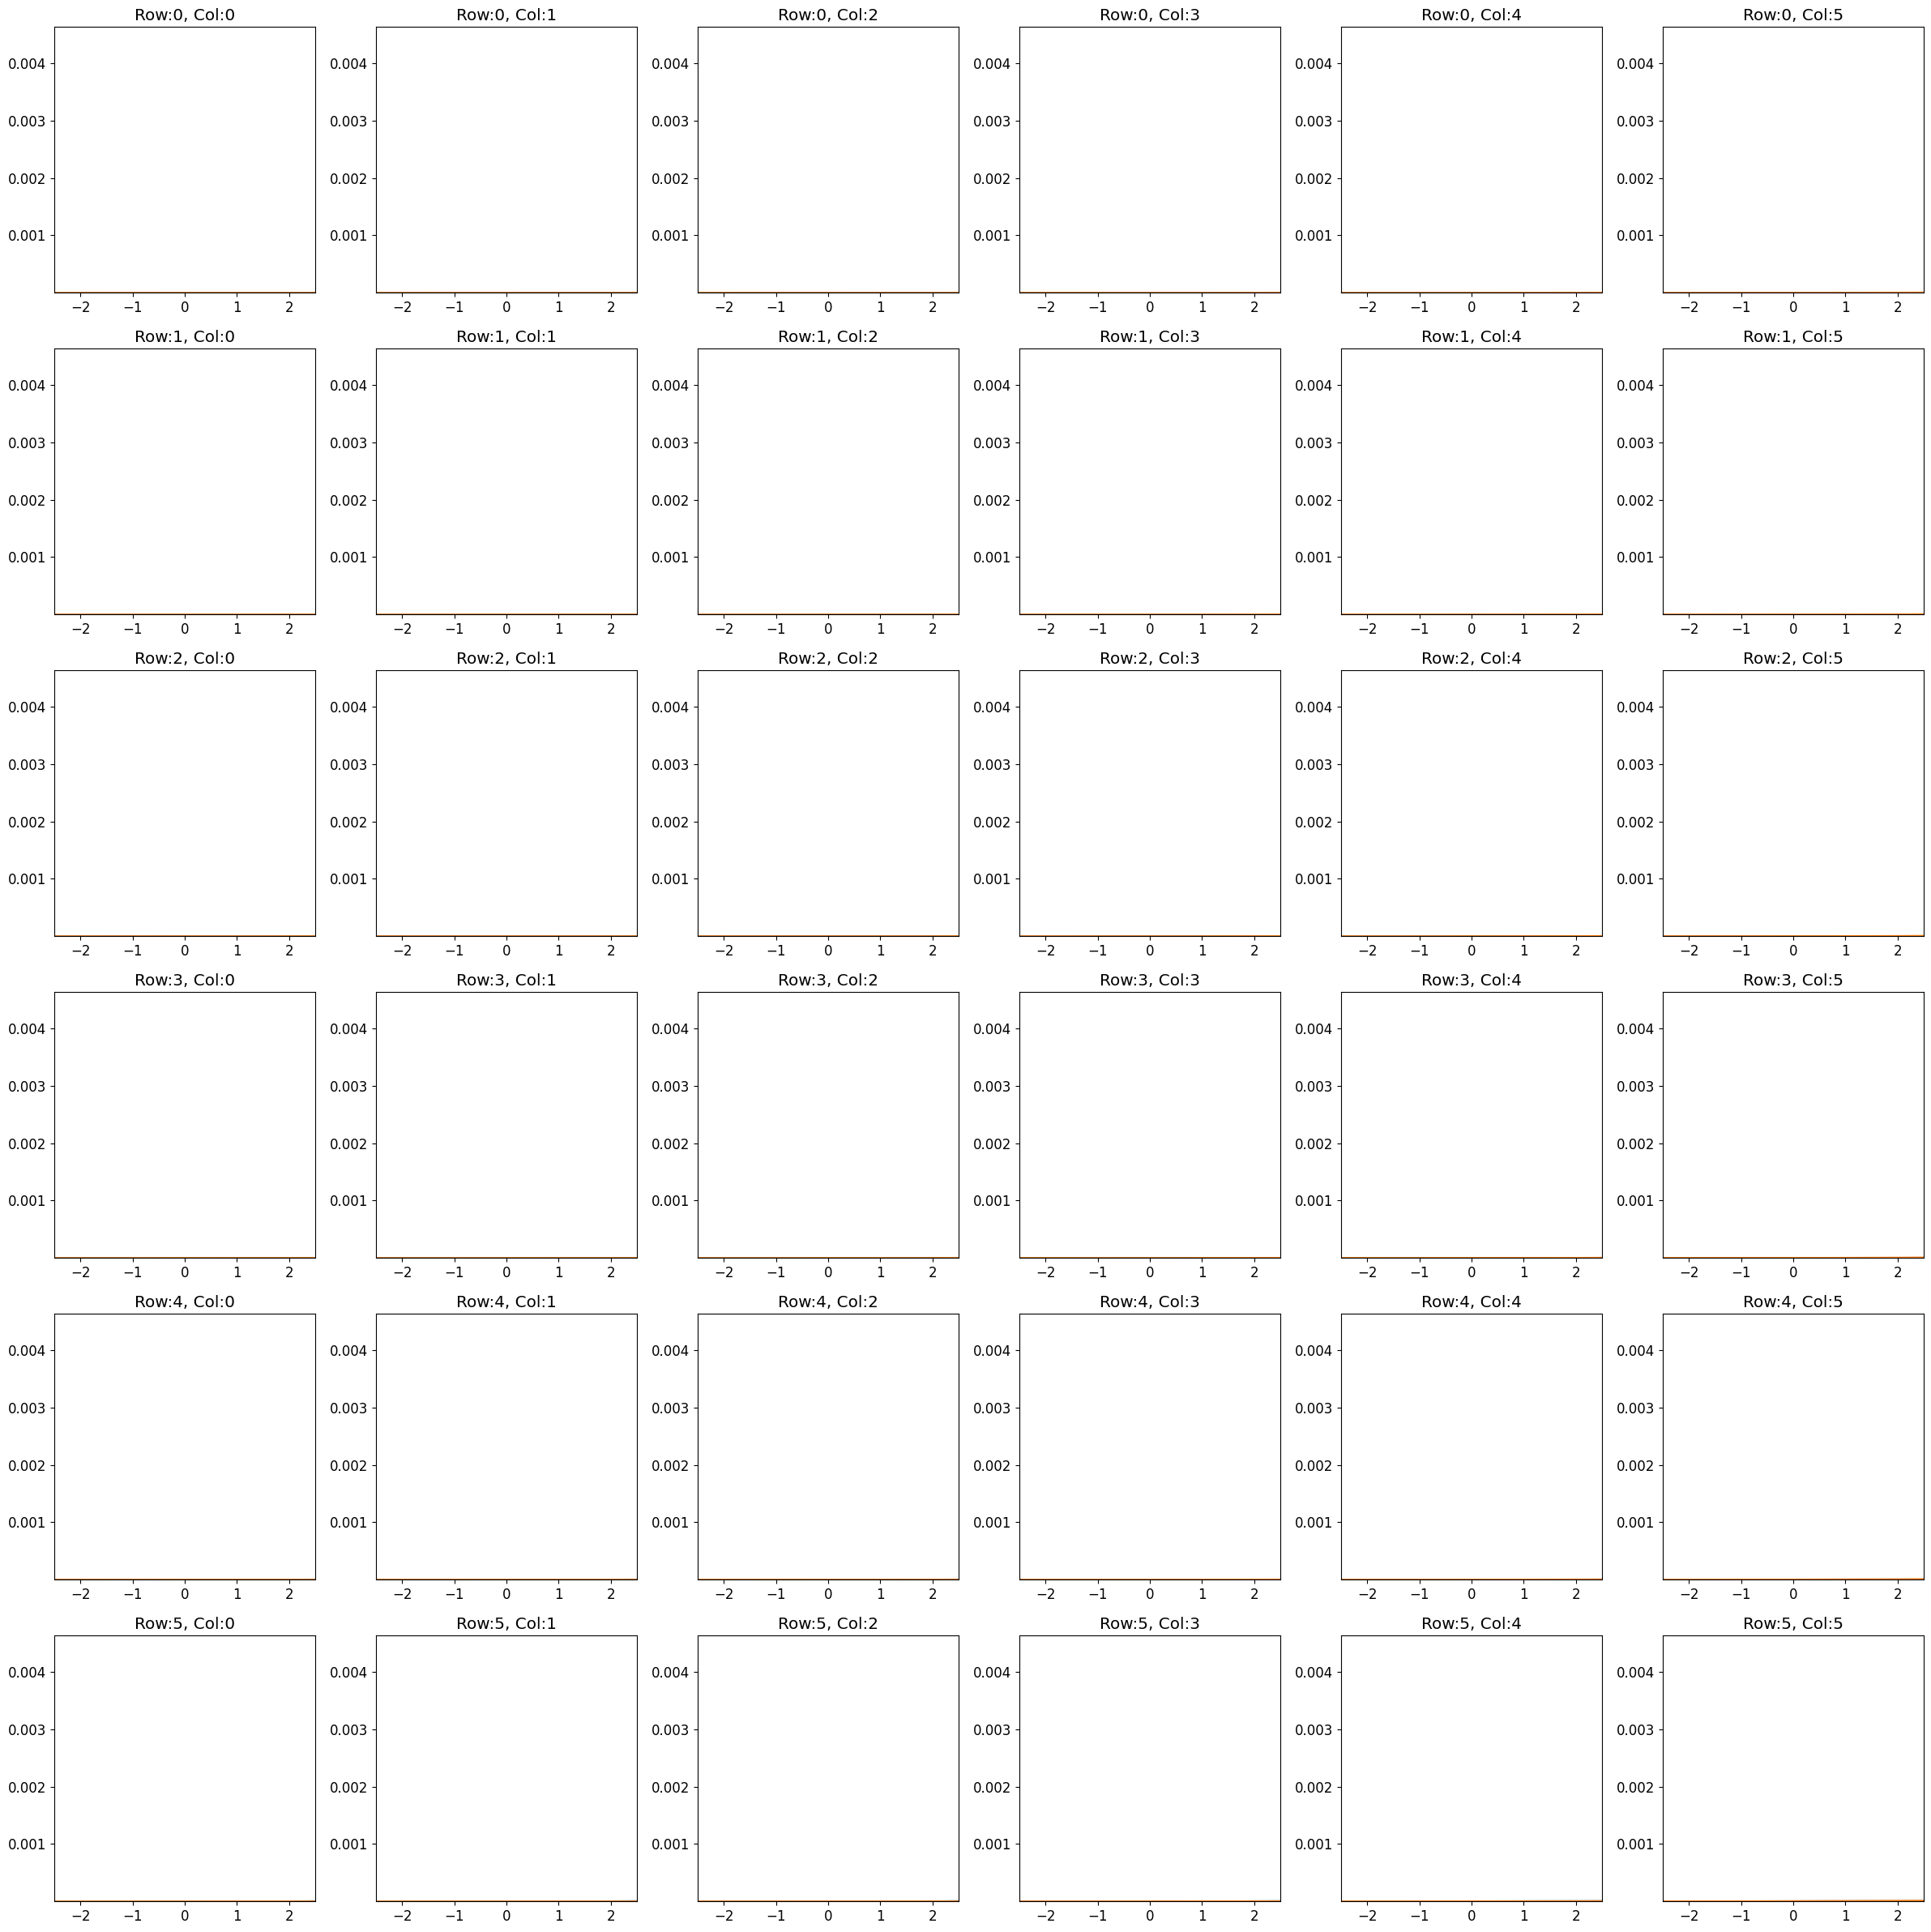

In [12]:
pyPLD.plot_array_of_1d_plots_trough_centre_of_films(xx,yy,thinfilms_dopant_ratio,res_model,dim_model,radius=2.5,filename=filename,save=False)

### Simulate film candidate
Below the chosen film candidate is sumulated. First the plumes are calculated and plotted.

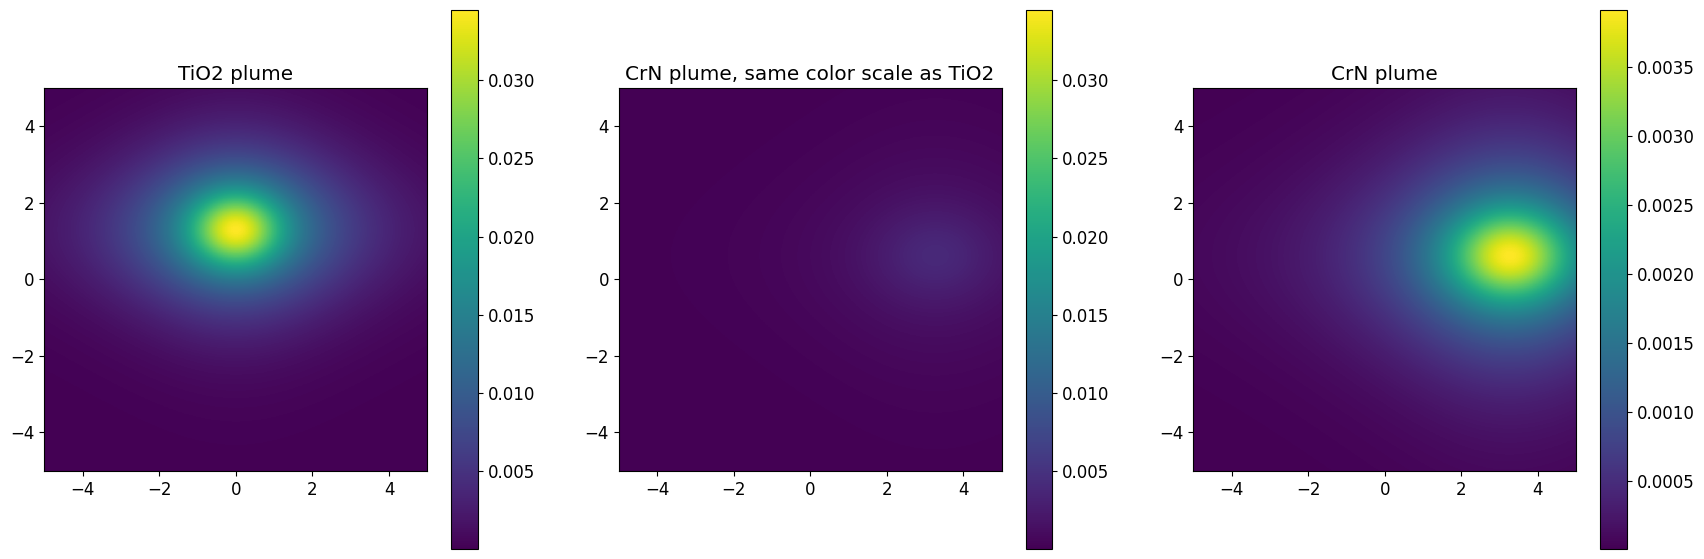

In [13]:
x_shift=0
#y_shift=1.8
y_shift=1.3
#y_shift=1.4

plume_TiO2 =pyPLD.def_plume(T_0=popt_TiO2[0],
                 z=popt_TiO2[1], 
                 n=[popt_TiO2[2],popt_TiO2[4]], 
                 m=[popt_TiO2[3],popt_TiO2[5]], 
                 shift=[x_shift,y_shift],
                 dim=dim_model,
                 res=res_model,
                double=double
                )    

plume_CrN =pyPLD.def_plume(T_0=popt_Cr2O3[0],
                 z=popt_Cr2O3[1], 
                 n=[popt_Cr2O3[2],popt_Cr2O3[4]], 
                 m=[popt_Cr2O3[3],popt_Cr2O3[5]], 
                 shift=[x_shift+popt_Cr2O3[6]-popt_TiO2[6],y_shift+popt_Cr2O3[7]-popt_TiO2[7]],
                 dim=dim_model,
                 res=res_model,                
                 double=double
                )    


fig = plt.figure(figsize=(21,7))
ax = fig.subplots(1,3)
vmin=np.amin(plume_CrN)
vmax=np.amax(plume_TiO2)
im1=ax[0].pcolormesh(xx,yy,plume_TiO2, vmin=vmin, vmax=vmax)
ax[0].set_aspect('equal')
ax[0].set_title('TiO2 plume')
fig.colorbar(im1,ax=ax[0],)

im2=ax[1].pcolormesh(xx,yy,plume_CrN, vmin=vmin, vmax=vmax)
ax[1].set_aspect('equal')
ax[1].set_title('CrN plume, same color scale as TiO2')
fig.colorbar(im2, ax=ax[1])

im3=ax[2].pcolormesh(xx,yy,plume_CrN)
ax[2].set_aspect('equal')
ax[2].set_title('CrN plume')
fig.colorbar(im3, ax=ax[2])

In [14]:
TiO2_density=3.8 #g/cm3 anatase (uncertian anything from 3.78-3.9 given)
TiO2_molar_mass=79.88 #g/mol
CrN_density=5.9 #g/cm3
CrN_molar_mass=66.003 #g/mol
Cr2O3_density=5.22 #g/cm3
Cr2O3_molar_mass=151.99 #g/mol


TiO2_molar_density=TiO2_density/TiO2_molar_mass #mol/cm3
CrN_molar_density=CrN_density/CrN_molar_mass #mol/cm3
Cr2O3_molar_density=Cr2O3_density/Cr2O3_molar_mass #mol/cm3

TiO2_atomic_density=3*TiO2_density/TiO2_molar_mass*6.0221409e+23 #atoms/cm3
CrN_atomic_density=2*CrN_density/CrN_molar_mass*6.0221409e+23 #atoms/cm3
Cr2O3_atomic_density=5*Cr2O3_density/Cr2O3_molar_mass*6.0221409e+23 #atoms/cm3


CrN_to_TiO2_molar_density_ratio=CrN_molar_density/TiO2_molar_density
CrN_to_TiO2_atomic_density_ratio=CrN_atomic_density/TiO2_atomic_density

Cr2O3_to_TiO2_molar_density_ratio=Cr2O3_molar_density/TiO2_molar_density
Cr2O3_to_TiO2_atomic_density_ratio=Cr2O3_atomic_density/TiO2_atomic_density



print('TiO2 molar density: ',TiO2_molar_density,'mol/cm3')
print('CrN molar density: ',CrN_molar_density,'mol/cm3')
print('Cr2O3 molar density: ',Cr2O3_molar_density,'mol/cm3')

print('CrN to TiO2 molar density ratio: ',CrN_to_TiO2_molar_density_ratio)
print('Cr2O3 to TiO2 molar density ratio: ',Cr2O3_to_TiO2_molar_density_ratio)

print('TiO2 atomic density: ',TiO2_atomic_density,'atoms/cm3')
print('CrN atomic density: ',CrN_atomic_density,'atoms/cm3')
print('Cr2O3 atomic density: ',Cr2O3_atomic_density,'atoms/cm3')

print('CrN to TiO2 atomic density ratio: ',CrN_to_TiO2_atomic_density_ratio)
print('Cr2O3 to TiO2 atomic density ratio: ',Cr2O3_to_TiO2_atomic_density_ratio)



TiO2 molar density:  0.04757135703555333 mol/cm3
CrN molar density:  0.08938987621774769 mol/cm3
Cr2O3 molar density:  0.034344364760839526 mol/cm3
CrN to TiO2 molar density ratio:  1.8790692927036012
Cr2O3 to TiO2 molar density ratio:  0.721954699235753
TiO2 atomic density:  8.594442446169253e+22 atoms/cm3
CrN atomic density:  1.0766368592336713e+23 atoms/cm3
Cr2O3 atomic density:  1.0341330185538522e+23 atoms/cm3
CrN to TiO2 atomic density ratio:  1.252712861802401
Cr2O3 to TiO2 atomic density ratio:  1.2032578320595884


Below the thikness (TOP) and the daopant ration (bottom) is pltted in x and y diredtiont rough the film centre. 

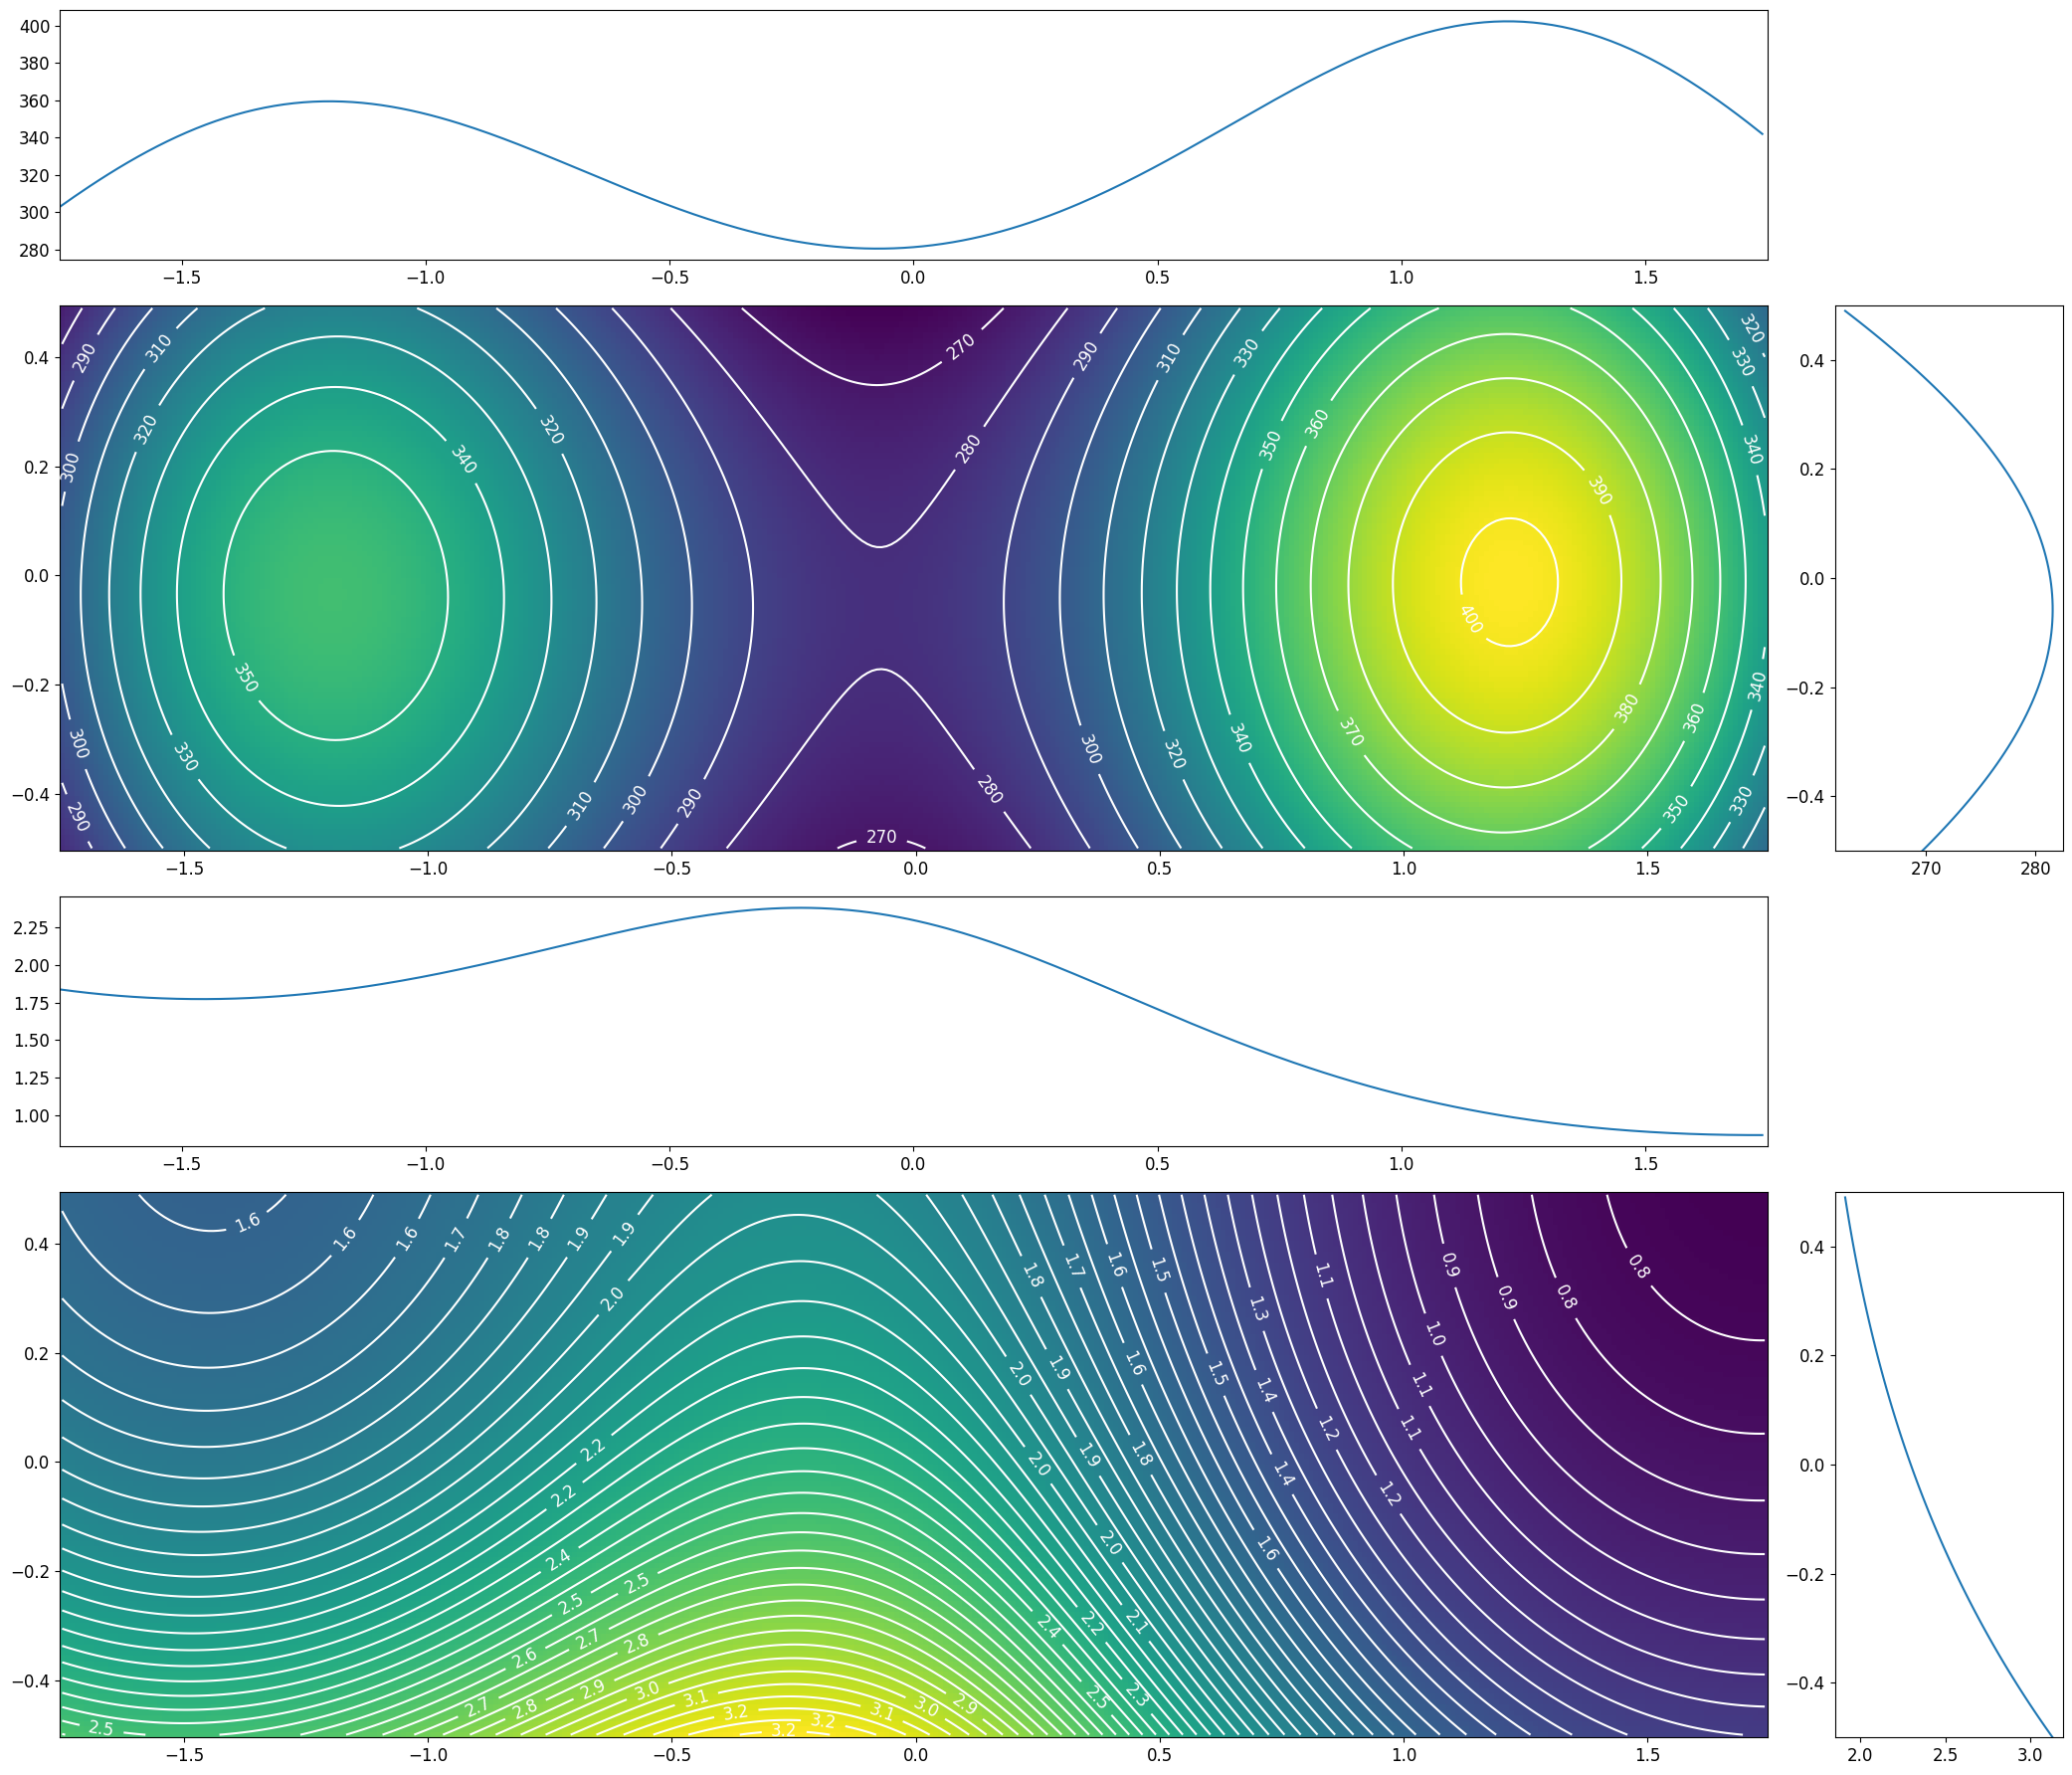

In [15]:
#Optimized for even thikness

# to cover ~2-8.4 at% Cr (26*TiO2@TiO2 + 22*TiO2@CrN +45*CrN@CrN)*400 @y=1.3
pulse_ratio_CrN_to_TiO2=26/45 #ratio between TiO2 pulses at 0 deg and CrN at 180deg
pulse_ratio_TiO2_to_TiO2=(22/26) #ratio between TiO2 pulses at 180 deg and 0deg
pulse_ratio_CrN_to_CrN=0
n_pulses_CrN=45*400


# to cover ~5.2-24.5 at% Cr (26*TiO2@TiO2 + 13*TiO2@CrN +139*CrN@CrN)*400 @y=1.4
#pulse_ratio_CrN_to_TiO2=26/139 #ratio between TiO2 pulses at 0 deg and CrN at 180deg
#pulse_ratio_TiO2_to_TiO2=(13/26) #ratio between TiO2 pulses at 180 deg and 0deg
#pulse_ratio_CrN_to_CrN=0
#n_pulses_CrN=139*400

# to cover ~0.2-8 at% Cr ~1600% thikness variation (36*TiO2@TiO2 + 3 CrN@CrN)*1300 @y=1.8
#pulse_ratio_CrN_to_TiO2=12 #ratio between TiO2 pulses at 0 deg and CrN at 180deg
#pulse_ratio_TiO2_to_TiO2=0 #ratio between TiO2 pulses at 180 deg and 0deg
#pulse_ratio_CrN_to_CrN=0
#n_pulses_CrN=3900

thinfilm_thikness=(ndimage.rotate(plume_CrN, 180., reshape=False)+plume_CrN*pulse_ratio_CrN_to_CrN+plume_TiO2*pulse_ratio_CrN_to_TiO2+ndimage.rotate(plume_TiO2, 180., reshape=False)*(pulse_ratio_CrN_to_TiO2*pulse_ratio_TiO2_to_TiO2))*n_pulses_CrN
thinfilm_dopant_ratio=((ndimage.rotate(plume_CrN, 180., reshape=False)+plume_CrN*pulse_ratio_CrN_to_CrN)*n_pulses_CrN/thinfilm_thikness)

plt.rcParams.update({'font.size': 12})
plt.rcParams.update({'xtick.labelsize': 12})
plt.rcParams.update({'ytick.labelsize': 12})

fig = plt.figure(figsize=(21, 18))
ax1 = plt.subplot2grid((6, 7), (0, 0), colspan=6)
ax2 = plt.subplot2grid((6, 7), (1, 0), colspan=6,rowspan=2)
ax3 = plt.subplot2grid((6, 7), (1, 6), rowspan=2)



im1=ax2.pcolormesh(yy[sample_holder[3][0]:sample_holder[3][1],sample_holder[3][2]:sample_holder[4][3]],xx[sample_holder[3][0]:sample_holder[3][1],sample_holder[3][2]:sample_holder[4][3]],thinfilm_thikness[sample_holder[3][0]:sample_holder[3][1],sample_holder[3][2]:sample_holder[4][3]])
c1=ax2.contour(yy[sample_holder[3][0]:sample_holder[3][1],sample_holder[3][2]:sample_holder[4][3]],xx[sample_holder[3][0]:sample_holder[3][1],sample_holder[3][2]:sample_holder[4][3]],thinfilm_thikness[sample_holder[3][0]:sample_holder[3][1],sample_holder[3][2]:sample_holder[4][3]], 15, colors='w')

ax1.plot(yy[int(res_model/2),sample_holder[3][2]:sample_holder[4][3]],thinfilm_thikness[int(res_model/2),sample_holder[3][2]:sample_holder[4][3]])
ax3.plot(thinfilm_thikness[sample_holder[3][0]:sample_holder[3][1],int(res_model/2)],xx[sample_holder[3][0]:sample_holder[3][1],int(res_model/2)])

ax1.set_xlim((yy[int(res_model/2),sample_holder[3][2]],yy[int(res_model/2),sample_holder[4][3]]))
ax3.set_ylim((xx[sample_holder[3][0],int(res_model/2)],xx[sample_holder[3][1],int(res_model/2)]))


ax4 = plt.subplot2grid((6, 7), (3, 0), colspan=6)
ax5 = plt.subplot2grid((6, 7), (4, 0), colspan=6,rowspan=2)
ax6 = plt.subplot2grid((6, 7), (4, 6), rowspan=2)

ax4.plot(yy[int(res_model/2),sample_holder[3][2]:sample_holder[4][3]],thinfilm_dopant_ratio[int(res_model/2),sample_holder[3][2]:sample_holder[4][3]]*2/5*Cr2O3_to_TiO2_atomic_density_ratio*100)
ax6.plot(thinfilm_dopant_ratio[sample_holder[3][0]:sample_holder[3][1],int(res_model/2)]*2/5*Cr2O3_to_TiO2_atomic_density_ratio*100,xx[sample_holder[3][0]:sample_holder[3][1],int(res_model/2)])

ax4.set_xlim((yy[int(res_model/2),sample_holder[3][2]],yy[int(res_model/2),sample_holder[4][3]]))
ax6.set_ylim((xx[sample_holder[3][0],int(res_model/2)],xx[sample_holder[3][1],int(res_model/2)]))

im1=ax5.pcolormesh(yy[sample_holder[3][0]:sample_holder[3][1],sample_holder[3][2]:sample_holder[4][3]],xx[sample_holder[3][0]:sample_holder[3][1],sample_holder[3][2]:sample_holder[4][3]],thinfilm_dopant_ratio[sample_holder[3][0]:sample_holder[3][1],sample_holder[3][2]:sample_holder[4][3]]*2/5*Cr2O3_to_TiO2_atomic_density_ratio*100)
c2=ax5.contour(yy[sample_holder[3][0]:sample_holder[3][1],sample_holder[3][2]:sample_holder[4][3]],xx[sample_holder[3][0]:sample_holder[3][1],sample_holder[3][2]:sample_holder[4][3]],thinfilm_dopant_ratio[sample_holder[3][0]:sample_holder[3][1],sample_holder[3][2]:sample_holder[4][3]]*2/5*Cr2O3_to_TiO2_atomic_density_ratio*100,15, colors='w',levels=50)



ax2.clabel(c1, c1.levels,fmt='%1.0f')
ax5.clabel(c2, c2.levels,fmt='%1.1f')

plt.tight_layout()
#fig.savefig(fname='Plot_of_combinatorial_film_thikness_and_dopant_distribution.png')
